In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving diabetes1.csv to diabetes1.csv


In [ ]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['diabetes1.csv']))
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
# df=pd.read_csv(r"C:\Users\kamalyogi\Downloads\diabetes1.csv")
x=df.iloc[:,0:8]
y=df["Outcome"]


In [ ]:
obj=StandardScaler()
x_=obj.fit_transform(x)

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x_,y,test_size=0.1)

In [ ]:
model=models.Sequential()
model.add(layers.Dense(100,activation="relu"))
#model.add(layers.Dense(75,activation="relu"))
model.add(layers.Dense(50,activation="relu"))
#model.add(layers.Dense(25,activation="relu"))
model.add(layers.Dense(12,activation="relu"))
model.add(layers.Dense(8,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
history=model.fit(Xtrain,Ytrain,epochs=50, validation_data=(Xtest,Ytest))
    

Epoch 1/50
22/22 [==============================] - 1s 14ms/step - loss: 0.6236 - accuracy: 0.6975 - val_loss: 0.5538 - val_accuracy: 0.7013
Epoch 2/50
22/22 [==============================] - 0s 5ms/step - loss: 0.5222 - accuracy: 0.7554 - val_loss: 0.4709 - val_accuracy: 0.8052
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: 0.4799 - accuracy: 0.7641 - val_loss: 0.4390 - val_accuracy: 0.8182
Epoch 4/50
22/22 [==============================] - 0s 5ms/step - loss: 0.4553 - accuracy: 0.7757 - val_loss: 0.4178 - val_accuracy: 0.8052
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: 0.4444 - accuracy: 0.7916 - val_loss: 0.4142 - val_accuracy: 0.7922
Epoch 6/50
22/22 [==============================] - 0s 4ms/step - loss: 0.4364 - accuracy: 0.7873 - val_loss: 0.4106 - val_accuracy: 0.8052
Epoch 7/50
22/22 [==============================] - 0s 4ms/step - loss: 0.4245 - accuracy: 0.8046 - val_loss: 0.4131 - val_accuracy: 0.7922
Epoch 8/50
22/22 [=

In [ ]:
result=model.evaluate(Xtest,Ytest)


3/3 [==============================] - 0s 5ms/step - loss: 0.7147 - accuracy: 0.7532


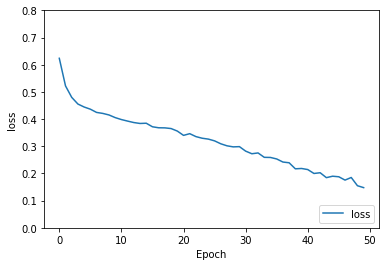

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 0.8])
plt.legend(loc='lower right')

3/3 - 0s - loss: 0.7147 - accuracy: 0.7532 - 21ms/epoch - 7ms/step


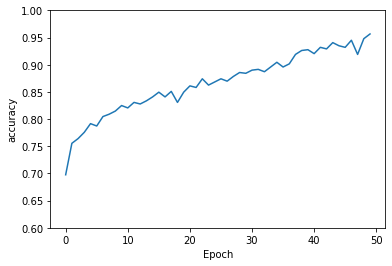

In [ ]:
test_loss, test_acc = model.evaluate(Xtest, Ytest, verbose=2)
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.ylim([0.6,1])
plt.plot(history.history['accuracy'], label = 'accuracy')